# TASCA M5 T02

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter

In [2]:
# import dataset
columnes= ['CRIM', 'ZN', 'INDUS','CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
housing = pd.read_csv('C:\housing_data.csv', names = columnes, header= None, encoding = "ISO-8859-1" )

housing_dummy = housing.copy()

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


- CRIM -> taxa de criminalitat per cápita per ciutat.
- ZN -> proporció de sòl residencial zonificat per a lots de més de 25.000 metres cuadrats
- INDUS -> proporció d'hectàrees comercials no minoristes per ciutat
- CHAS -> variable ficticia de Charles River (=1 si el tram limita el riu; 0 en cas contrari)
- NOX -> concentració d'òxids nítrics (parts per 10 milions)
- RM -> nombre mitjà d'habitacions per habitatge
- AGE -> proporció d'unitats ocupades pels propietaris construïdes abans de 1940.
- DIS -> distàncices ponderades fins a cinc centres de treball de boston
- RAD -> índex d'accessibilitat a les carreteres radials.
- TAX -> Taxa de l'impost sobre béns inmobles de valor total per 10.000 dólars
- PTRATIO -> ràtio alumnes professor per municipi.
- B -> 1000(BK - 0.63)^2 on BK és la proporció de negres per ciutat.
- LSTAT -> % d'estatus inferior de la població.
- MEDV -> Valor mitjà de les cases opcupades pel propietari per 1000 dolars.

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


- count: suma dels valors no nuls de cada atribut.
- mean: valor mig de l'atribut.
- std: desviació estándar dels valors d'aquell atribut.
- min: valor mínim de l'atribut.
- 25%,50%,75% : Valos corresponents amb els percentils.
- max: valor màxim per cada atribut

In [6]:
# miro si hi ha elements duplicats
housing_clean = housing.drop_duplicates()
if len(housing_clean) == len(housing):
    print("No hi ha elements duplicats")
else:
    print("Hi ha elements duplicats")

No hi ha elements duplicats


In [7]:
# comprovo si hi ha elements nuls
housing.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
# comprovo si hi ha elements nuls.
(housing.isnull().sum())*100 / len(housing)

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
MEDV       0.0
dtype: float64

## Exercici 1 
Parteix el conjunt de dades adjunt en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.
També adjunt trobaràs una descripció de les diferents variables del dataset.

In [25]:
# trio la sortida
y = housing.MEDV
# trio l'entrada eliminant la variable de sortida
x = housing.drop('MEDV', axis = 1)
# dividim les dades
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=1)
# apliquem 3 algoritmes de regressió:
#LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train, y_train)
train_1 = model.score(x_train, y_train)
test_1 = model.score(x_test, y_test)
print('el resultat del primer model LinearRegression train és',train_1)
print('el resultat del primer model LinearRegression test és',test_1)
#GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
model_2 = GradientBoostingRegressor(random_state=0).fit(x_train, y_train)
train_2 = model_2.score(x_train, y_train)
test_2 = model_2.score(x_test, y_test)
print('el resultat del segon model Gradient Boosting train és', train_2)
print('el resultat del segon model Gradient Boosting test es', test_2)
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
model_3 = RandomForestRegressor (random_state = 0).fit(x_train, y_train)
train_3 = model_3.score(x_train, y_train)
test_3 = model_3.score(x_test, y_test)
print('el resultat del tercer model Random Forest train és', train_3)
print('el resultat del tercer model Random Forest test és', test_3)

el resultat del primer model LinearRegression train és 0.7293585058196337
el resultat del primer model LinearRegression test és 0.7634174432138467
el resultat del segon model Gradient Boosting train és 0.977914662228525
el resultat del segon model Gradient Boosting test es 0.9248242071348934
el resultat del tercer model Random Forest train és 0.982948762782292
el resultat del tercer model Random Forest test és 0.9093408123842346


Com podem observar als resultats dels coeficients, el primer model ajusta pitjor, pero el segon i el tercer ajusten molt millor.


## Exercici 2

Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

### Dummy 

In [10]:
# faig la variable dummy
housing_dummy_CHAS= pd.get_dummies(housing_dummy["CHAS"], prefix = "CHAS")

In [11]:
# agreguem les columnes
housing_dummy = pd.concat([housing_dummy, housing_dummy_CHAS], axis = 1)
housing_dummy = housing_dummy.rename(columns={'CHAS_1' : 'RIVER_LIMIT', 'CHAS_0' : 'NO_RIVER'})
housing_dummy

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,NO_RIVER,RIVER_LIMIT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,1,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,1,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,1,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,1,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4,1,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6,1,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9,1,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0,1,0


In [12]:
# si només vull la columna Dummie
housing_dummy = housing_dummy.drop(['CRIM', 'ZN', 'INDUS','CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'], axis=1)
housing_dummy

,NO_RIVER,RIVER_LIMIT
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
501,1,0
502,1,0
503,1,0
504,1,0


### Estandarització

In [13]:
housing_standard_scaler = preprocessing.StandardScaler().fit_transform(housing)
# estandaritzat = (X-media) / std
housing_robust_scaler = preprocessing.RobustScaler().fit_transform(housing)
# estandaritzat = (X- rang_intercuartilic) / std
housing_standard_scaler, housing_robust_scaler

(array([[-0.41978194,  0.28482986, -1.2879095 , ...,  0.44105193,
         -1.0755623 ,  0.15968566],
        [-0.41733926, -0.48772236, -0.59338101, ...,  0.44105193,
         -0.49243937, -0.10152429],
        [-0.41734159, -0.48772236, -0.59338101, ...,  0.39642699,
         -1.2087274 ,  1.32424667],
        ...,
        [-0.41344658, -0.48772236,  0.11573841, ...,  0.44105193,
         -0.98304761,  0.14880191],
        [-0.40776407, -0.48772236,  0.11573841, ...,  0.4032249 ,
         -0.86530163, -0.0579893 ],
        [-0.41500016, -0.48772236,  0.11573841, ...,  0.44105193,
         -0.66905833, -1.15724782]]),
 array([[-0.06959315,  1.44      , -0.57164988, ...,  0.26190191,
         -0.63768116,  0.35109718],
        [-0.06375455,  0.        , -0.20294345, ...,  0.26190191,
         -0.22188906,  0.05015674],
        [-0.06376011,  0.        , -0.20294345, ...,  0.06667466,
         -0.73263368,  1.69278997],
        ...,
        [-0.05445006,  0.        ,  0.17350891, ...,  

## Exercici 3

Resumeix les noves columnes generades de manera estadística i gràfica

### Dummy

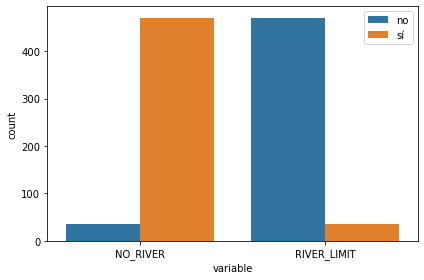

In [14]:
# faig el gràfic representatiu de les dues columnes Dummy
housing_dummiesm = housing_dummy.melt()
ax = sns.countplot(data=housing_dummiesm, x='variable', hue='value')
ax.legend(labels=['no','sí'])
plt.tight_layout()
plt.show()

In [15]:
print(housing_dummy['NO_RIVER'].value_counts())

1    471
0     35
Name: NO_RIVER, dtype: int64


In [16]:
no_river = ((471-35)/471)*100
print("les cases que no estan al costat del riu són ","{0:.2f}".format(no_river),"%")

les cases que no estan al costat del riu són  92.57 %


In [17]:
print(housing_dummy['RIVER_LIMIT'].value_counts())

0    471
1     35
Name: RIVER_LIMIT, dtype: int64


In [18]:
river = (35/471)*100
print("les cases que estan al costat del riu són ","{0:.2f}".format(river),"%")

les cases que estan al costat del riu són  7.43 %


### Estandarització

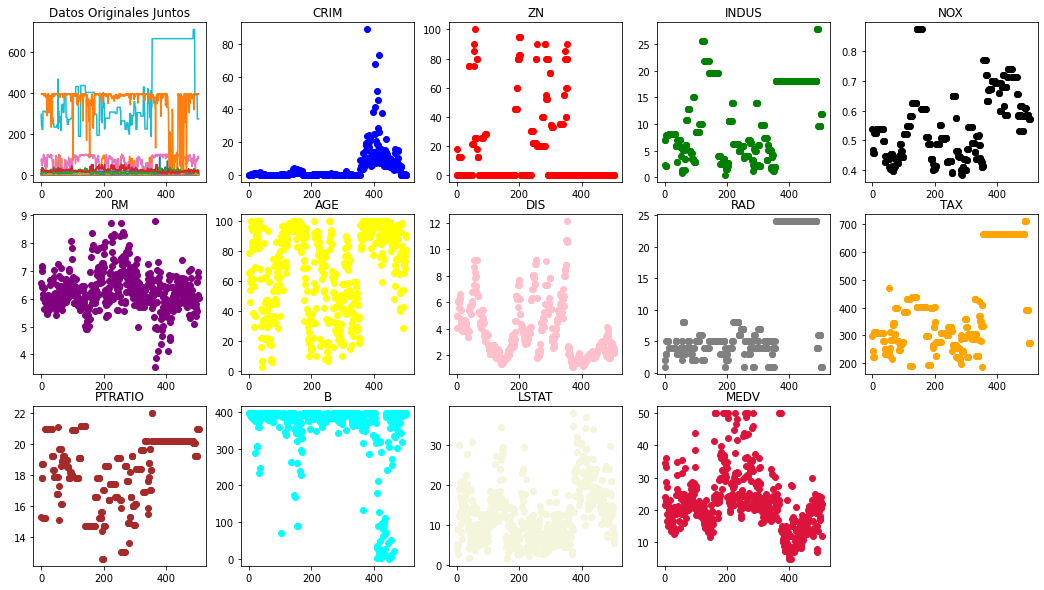

In [19]:
# dissenyo els gràfics per veure les distribucions de cada variable
fig = plt.figure(figsize=(18,10))
ax1 = fig.add_subplot(3,5,1)
ax2 = fig.add_subplot(3,5,2)
ax3 = fig.add_subplot(3,5,3)
ax4 = fig.add_subplot(3,5,4)
ax5 = fig.add_subplot(3,5,5)
ax6 = fig.add_subplot(3,5,6)
ax7 = fig.add_subplot(3,5,7)
ax8 = fig.add_subplot(3,5,8)
ax9 = fig.add_subplot(3,5,9)
ax10 = fig.add_subplot(3,5,10)
ax11 = fig.add_subplot(3,5,11)
ax12 = fig.add_subplot(3,5,12)
ax13 = fig.add_subplot(3,5,13)
ax14 = fig.add_subplot(3,5,14)
# omplo els gràfics
ax1.set_title("Datos Originales Juntos")
ax1.plot(housing)
ax2.set_title("CRIM")
ax2.plot(housing["CRIM"],linewidth=0,marker="o",color="blue",markersize = 6)
ax3.set_title("ZN")
ax3.plot(housing["ZN"],linewidth=0,marker="o",color="red",markersize=6)
ax4.set_title("INDUS")
ax4.plot(housing["INDUS"],linewidth=0,marker="o",color="green",markersize=6)
ax5.set_title("NOX")
ax5.plot(housing["NOX"],linewidth=0,marker="o",color = "black",markersize = 6)
ax6.set_title("RM")
ax6.plot(housing["RM"],linewidth=0,marker="o",color="purple",markersize=6)
ax7.set_title("AGE")
ax7.plot(housing["AGE"],linewidth=0,marker="o",color="yellow",markersize=6)
ax8.set_title("DIS")
ax8.plot(housing["DIS"],linewidth=0,marker="o",color="pink",markersize=6)
ax9.set_title("RAD")
ax9.plot(housing["RAD"],linewidth=0,marker="o",color="grey",markersize=6)
ax10.set_title("TAX")
ax10.plot(housing["TAX"],linewidth=0,marker="o",color="orange",markersize=6)
ax11.set_title("PTRATIO")
ax11.plot(housing["PTRATIO"],linewidth=0,marker="o",color="brown",markersize=6)
ax12.set_title("B")
ax12.plot(housing["B"],linewidth=0,marker="o",color="aqua",markersize=6)
ax13.set_title("LSTAT")
ax13.plot(housing["LSTAT"],linewidth=0,marker="o",color="beige",markersize=6)
ax14.set_title("MEDV")
ax14.plot(housing["MEDV"],linewidth=0,marker="o",color="crimson",markersize=6)

Com podem observar (a l'eix y) hi ha molta diferència entre els valors, a continuació mostro el resultat una vegada aplicada l'estandardització.

In [20]:
# converteixo vectors de NumPy a DataFrames per graficar
housing_standard_scaler = pd.DataFrame(housing_standard_scaler, columns=[columnes]) 
housing_robust_scaler = pd.DataFrame(housing_robust_scaler, columns=[columnes])

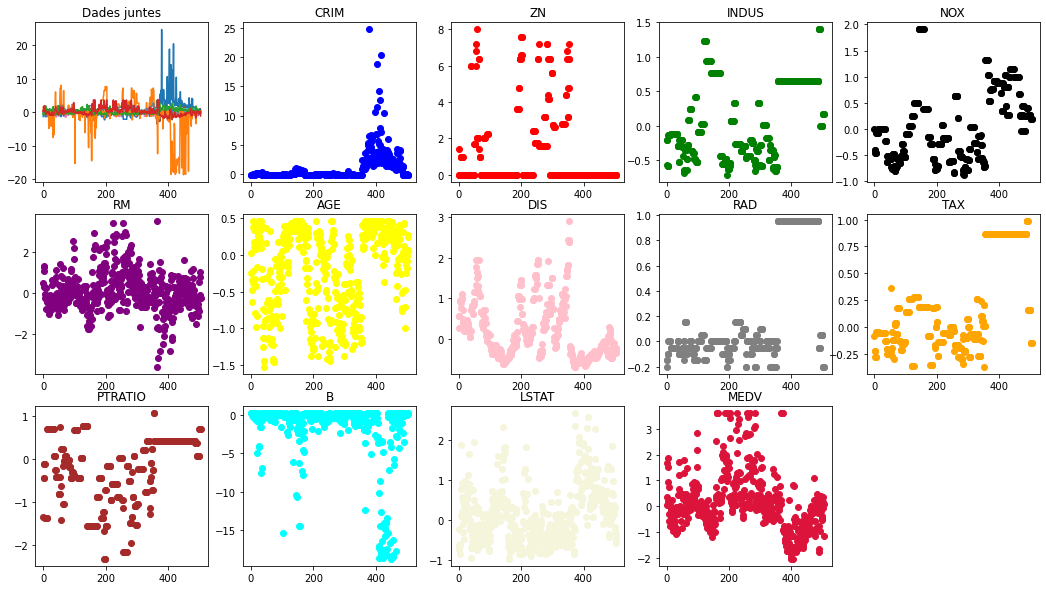

In [21]:
# mostro els gràfics amb el housing_robust_scaler
fig = plt.figure(figsize=(18,10))
ax1 = fig.add_subplot(3,5,1)
ax2 = fig.add_subplot(3,5,2)
ax3 = fig.add_subplot(3,5,3)
ax4 = fig.add_subplot(3,5,4)
ax5 = fig.add_subplot(3,5,5)
ax6 = fig.add_subplot(3,5,6)
ax7 = fig.add_subplot(3,5,7)
ax8 = fig.add_subplot(3,5,8)
ax9 = fig.add_subplot(3,5,9)
ax10 = fig.add_subplot(3,5,10)
ax11 = fig.add_subplot(3,5,11)
ax12 = fig.add_subplot(3,5,12)
ax13 = fig.add_subplot(3,5,13)
ax14 = fig.add_subplot(3,5,14)
# omplo els gràfics
ax1.set_title("Dades juntes")
ax1.plot(housing_robust_scaler)
ax2.set_title("CRIM")
ax2.plot(housing_robust_scaler["CRIM"],linewidth=0,marker="o",color="blue",markersize = 6)
ax3.set_title("ZN")
ax3.plot(housing_robust_scaler["ZN"],linewidth=0,marker="o",color="red",markersize=6)
ax4.set_title("INDUS")
ax4.plot(housing_robust_scaler["INDUS"],linewidth=0,marker="o",color="green",markersize=6)
ax5.set_title("NOX")
ax5.plot(housing_robust_scaler["NOX"],linewidth=0,marker="o",color = "black",markersize = 6)
ax6.set_title("RM")
ax6.plot(housing_robust_scaler["RM"],linewidth=0,marker="o",color="purple",markersize=6)
ax7.set_title("AGE")
ax7.plot(housing_robust_scaler["AGE"],linewidth=0,marker="o",color="yellow",markersize=6)
ax8.set_title("DIS")
ax8.plot(housing_robust_scaler["DIS"],linewidth=0,marker="o",color="pink",markersize=6)
ax9.set_title("RAD")
ax9.plot(housing_robust_scaler["RAD"],linewidth=0,marker="o",color="grey",markersize=6)
ax10.set_title("TAX")
ax10.plot(housing_robust_scaler["TAX"],linewidth=0,marker="o",color="orange",markersize=6)
ax11.set_title("PTRATIO")
ax11.plot(housing_robust_scaler["PTRATIO"],linewidth=0,marker="o",color="brown",markersize=6)
ax12.set_title("B")
ax12.plot(housing_robust_scaler["B"],linewidth=0,marker="o",color="aqua",markersize=6)
ax13.set_title("LSTAT")
ax13.plot(housing_robust_scaler["LSTAT"],linewidth=0,marker="o",color="beige",markersize=6)
ax14.set_title("MEDV")
ax14.plot(housing_robust_scaler["MEDV"],linewidth=0,marker="o",color="crimson",markersize=6)

In [22]:
housing_robust_scaler.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,5.060000e+02,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,5.060000e+02,506.000000,506.000000,506.000000,506.000000,5.060000e+02,506.000000
mean,9.337910e-01,0.909091,0.112067,0.069170,0.095400,0.103163,-0.181959,1.902672e-01,0.227470,0.202163,-0.212309,-1.667632,1.292417e-01,0.167123
std,2.392616e+00,1.865796,0.531398,0.253994,0.662158,0.952056,0.573881,6.818457e-01,0.435363,0.435496,0.773195,4.379176,7.137493e-01,1.153242
min,-6.959315e-02,0.000000,-0.714950,0.000000,-0.874286,-3.587398,-1.520897,-6.728244e-01,-0.200000,-0.369509,-2.303571,-18.761003,-9.625187e-01,-2.031348
25%,-4.852940e-02,0.000000,-0.348567,0.000000,-0.508571,-0.437669,-0.662080,-3.585445e-01,-0.050000,-0.131783,-0.589286,-0.770476,-4.407796e-01,-0.523511
50%,-7.697835e-18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.199102e-17,0.000000,0.000000,0.000000,0.000000,8.847090e-17,0.000000
75%,9.514706e-01,1.000000,0.651433,0.000000,0.491429,0.562331,0.337920,6.414555e-01,0.950000,0.868217,0.410714,0.229524,5.592204e-01,0.476489
max,2.467838e+01,8.000000,1.398141,1.000000,1.902857,3.484417,0.458716,2.888060e+00,0.950000,0.984496,1.053571,0.261902,2.659670e+00,3.611285


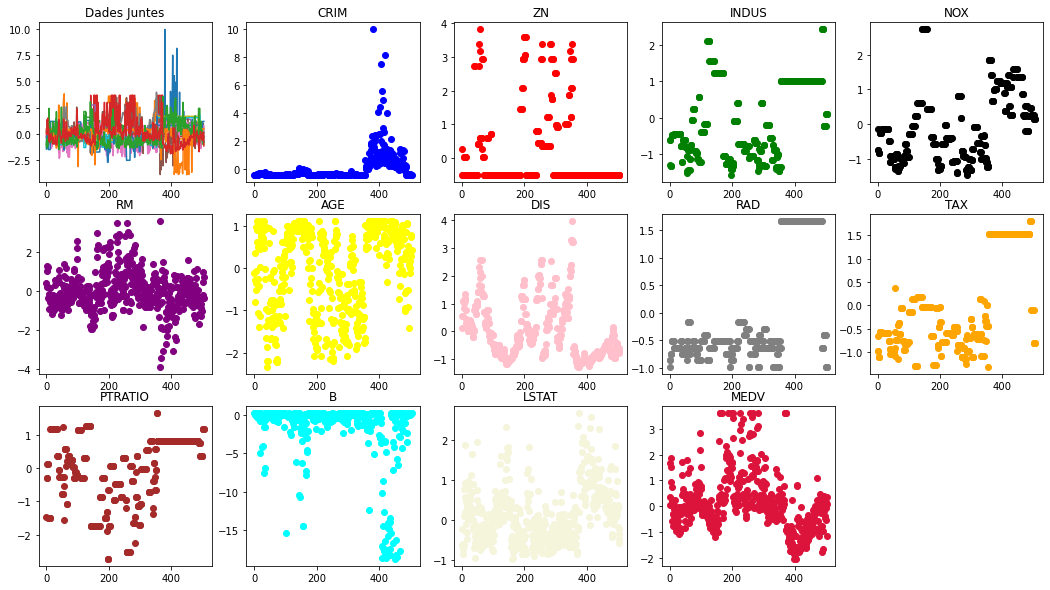

In [23]:
# mostro els gràfics amb el housing_standard_scaler
fig = plt.figure(figsize=(18,10))
ax1 = fig.add_subplot(3,5,1)
ax2 = fig.add_subplot(3,5,2)
ax3 = fig.add_subplot(3,5,3)
ax4 = fig.add_subplot(3,5,4)
ax5 = fig.add_subplot(3,5,5)
ax6 = fig.add_subplot(3,5,6)
ax7 = fig.add_subplot(3,5,7)
ax8 = fig.add_subplot(3,5,8)
ax9 = fig.add_subplot(3,5,9)
ax10 = fig.add_subplot(3,5,10)
ax11 = fig.add_subplot(3,5,11)
ax12 = fig.add_subplot(3,5,12)
ax13 = fig.add_subplot(3,5,13)
ax14 = fig.add_subplot(3,5,14)
# omplo els gràfics
ax1.set_title("Dades Juntes")
ax1.plot(housing_standard_scaler)
ax2.set_title("CRIM")
ax2.plot(housing_standard_scaler["CRIM"],linewidth=0,marker="o",color="blue",markersize = 6)
ax3.set_title("ZN")
ax3.plot(housing_standard_scaler["ZN"],linewidth=0,marker="o",color="red",markersize=6)
ax4.set_title("INDUS")
ax4.plot(housing_standard_scaler["INDUS"],linewidth=0,marker="o",color="green",markersize=6)
ax5.set_title("NOX")
ax5.plot(housing_standard_scaler["NOX"],linewidth=0,marker="o",color = "black",markersize = 6)
ax6.set_title("RM")
ax6.plot(housing_standard_scaler["RM"],linewidth=0,marker="o",color="purple",markersize=6)
ax7.set_title("AGE")
ax7.plot(housing_standard_scaler["AGE"],linewidth=0,marker="o",color="yellow",markersize=6)
ax8.set_title("DIS")
ax8.plot(housing_standard_scaler["DIS"],linewidth=0,marker="o",color="pink",markersize=6)
ax9.set_title("RAD")
ax9.plot(housing_standard_scaler["RAD"],linewidth=0,marker="o",color="grey",markersize=6)
ax10.set_title("TAX")
ax10.plot(housing_standard_scaler["TAX"],linewidth=0,marker="o",color="orange",markersize=6)
ax11.set_title("PTRATIO")
ax11.plot(housing_standard_scaler["PTRATIO"],linewidth=0,marker="o",color="brown",markersize=6)
ax12.set_title("B")
ax12.plot(housing_robust_scaler["B"],linewidth=0,marker="o",color="aqua",markersize=6)
ax13.set_title("LSTAT")
ax13.plot(housing_robust_scaler["LSTAT"],linewidth=0,marker="o",color="beige",markersize=6)
ax14.set_title("MEDV")
ax14.plot(housing_robust_scaler["MEDV"],linewidth=0,marker="o",color="crimson",markersize=6)

In [24]:
housing_standard_scaler.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-8.513173e-17,3.306534e-16,2.804081e-16,-3.100287e-16,-8.071058e-16,-5.189086e-17,-2.650493e-16,8.293761e-17,1.514379e-15,-9.934960e-16,4.493551e-16,-1.451408e-16,-1.595123e-16,-4.247810e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990e+00,-2.707379e+00,-3.907193e+00,-1.531127e+00,-1.908226e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-7.675760e-01,-4.880391e-01,2.050715e-01,-7.994200e-01,-5.994557e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-4.646726e-01,2.748590e-01,3.811865e-01,-1.812536e-01,-1.450593e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926e+00,8.065758e-01,4.336510e-01,6.030188e-01,2.685231e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194e+00,1.638828e+00,4.410519e-01,3.548771e+00,2.989460e+00


Com podem veure a les dades juntes dels dos scalers, al robust les dades estan més juntes que a l'estandard, això és perque el robust scaler s'utilitza amb el rang intercuartílic i això elimina les dades atípiques, encara que en aquest cas no totes. 